In [1]:
#Kaggle Competition
#House Prices - Advanced Regression Techniques

#Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df = pd.read_csv("C:\\Users\\Efemena Ikpro\\OneDrive\\Desktop\\Online programmes\\Python\House Prices - Advanced Regression Techniques\\train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Extracting only columns with null values
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

<AxesSubplot:>

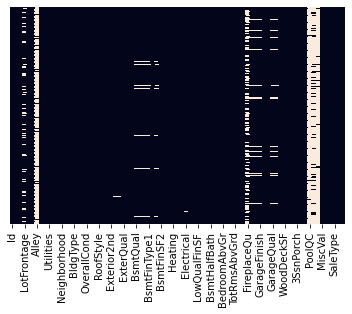

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [9]:
##Fill missing values - Using the mean (Integer/float)
df["LotFrontage"] = df['LotFrontage'].fillna(df["LotFrontage"].mean())
df["MasVnrArea"] = df['MasVnrArea'].fillna(df["MasVnrArea"].mean())
df["MasVnrArea"] = df['MasVnrArea'].fillna(df["MasVnrArea"].mean())

##Fill missing values - Using the mode(Categorical Data)
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df["BsmtCond"] = df["BsmtCond"].fillna(df["BsmtCond"].mode()[0])
df["BsmtExposure"] = df["BsmtExposure"].fillna(df["BsmtExposure"].mode()[0])
df["BsmtFinType1"] = df["BsmtFinType1"].fillna(df["BsmtFinType1"].mode()[0])
df["BsmtFinType2"] = df["BsmtFinType2"].fillna(df["BsmtFinType2"].mode()[0])
df["Electrical"] = df["Electrical"].fillna(df["Electrical"].mode()[0])
df["FireplaceQu"] = df["FireplaceQu"].fillna(df["FireplaceQu"].mode()[0])
df["GarageType"] = df["GarageType"].fillna(df["GarageType"].mode()[0])
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(df["GarageYrBlt"].mode()[0])
df["GarageFinish"] = df["GarageFinish"].fillna(df["GarageFinish"].mode()[0])
df["GarageQual"] = df["GarageQual"].fillna(df["GarageQual"].mode()[0])
df["GarageCond"] = df["GarageCond"].fillna(df["GarageCond"].mode()[0])


In [10]:
#Drop Columns
df.drop(['Alley', 'Fence', "PoolQC", "MiscFeature"], axis=1, inplace=True)

In [11]:
null_counts = df.isnull().sum()
null_counts[null_counts > 0]

Series([], dtype: int64)

In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(1460, 77)

In [15]:
#Analysing the dependent variable - SalePrice
df["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

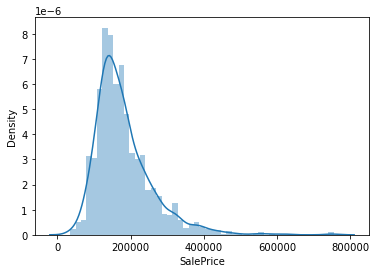

In [16]:
sns.distplot(df["SalePrice"])
#It deviates from a normal distribution
#It is positively skewed
#Show peakedness

In [17]:
#Skewness and Kurtosis
print("skewness: %f" % df["SalePrice"].skew())
print("Kurtosis: %f" % df["SalePrice"].kurt())

skewness: 1.882876
Kurtosis: 6.536282


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

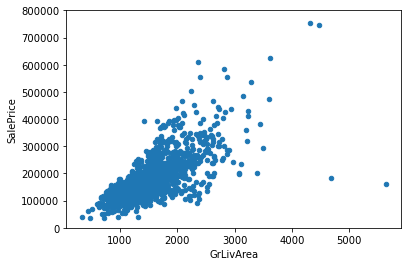

In [18]:
#Relationship between Saleprice and other numerical variable
df.plot.scatter(x="GrLivArea", y="SalePrice", ylim=(0,800000))

#There is a linear relationship between the two variable

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

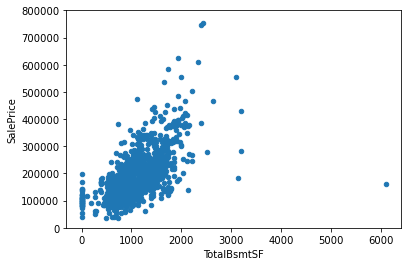

In [19]:
df.plot.scatter(x="TotalBsmtSF", y="SalePrice", ylim=(0,800000))

#It shows a good relationship between the two variable - strong linear relationship

(-0.5, 9.5, 0.0, 800000.0)

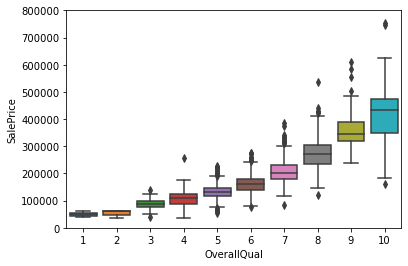

In [20]:
#Relationship between Saleprice and other categorical variable
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000)

#There is a good relationship between the two variable. Sales price increases with the overall quality

(-0.5, 111.5, 0.0, 800000.0)

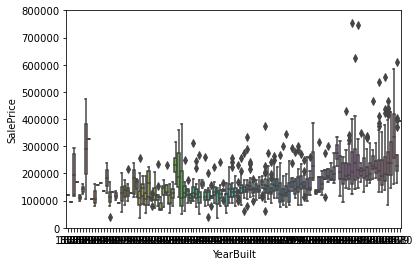

In [21]:
fig = sns.boxplot(x="YearBuilt", y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000)

#People are prone to spend more money on houses than old ones

<AxesSubplot:>

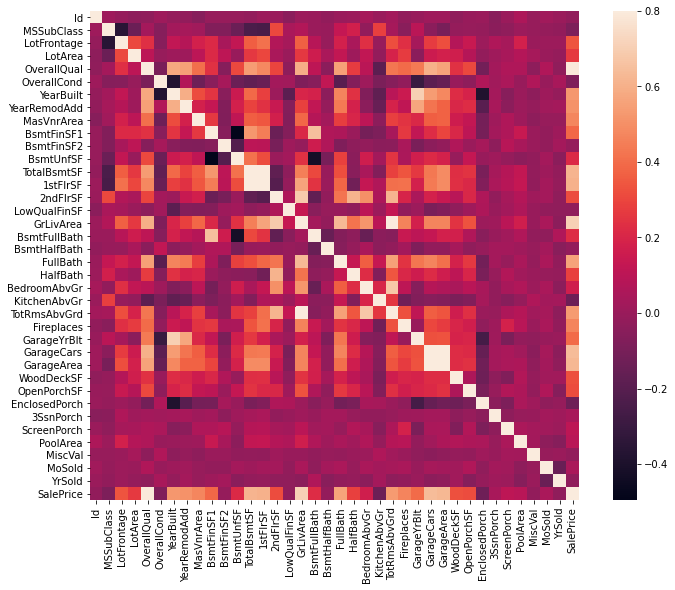

In [22]:
#Correlation between SalePrice and other variables in the dataset
a = df.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(a, vmax=.8, square=True)

#Some squares will capture your attention based on saleprice. They are "TotalBsmtSF", "1stflrSF", "GarageCars & Area"

#Actually, this correlation is so strong that it can indicate a situation of multicollinearity. 
#If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. 
#Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

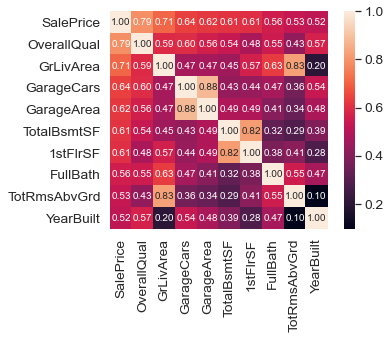

In [23]:
#'SalePrice' correlation matrix (zoomed heatmap style)

num = 10 #Number of variable in the heatmap
cols = a.nlargest(num, "SalePrice")["SalePrice"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

plt.show()

#OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
#GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.
#we can keep 'GarageCars' since its correlation with 'SalePrice' is higher
#TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right 


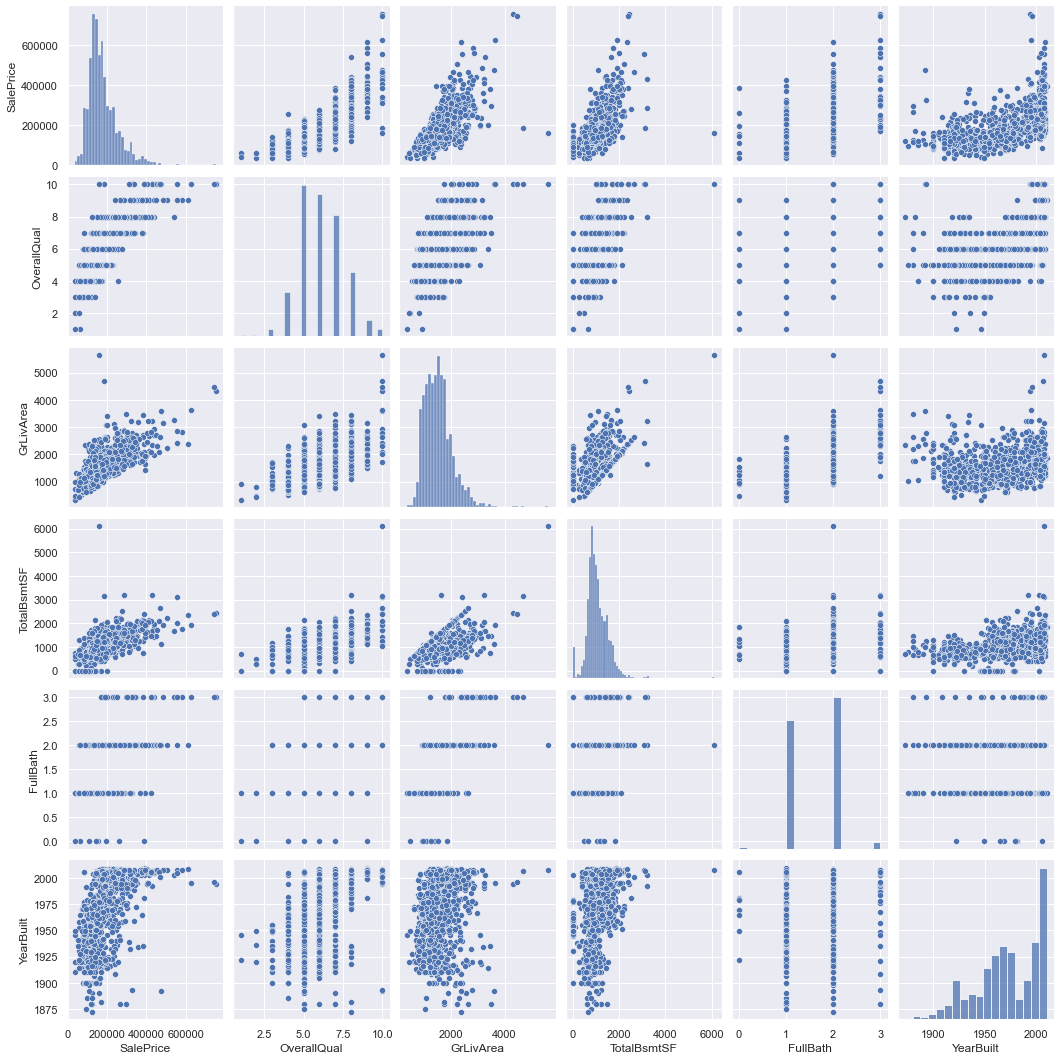

In [24]:
#Scatterplot for all the varibales in correlation with saleprice
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size=2.5)
plt.show()

In [25]:
#Dealing with Outliers
#Outliers is a complex subject and it deserves more attention. 
#Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.


In [26]:
#Univariate Analysis
#The primary concern here is to establish a threshold that defines an observation as an outlier. 
#To do so, we'll standardize the data. 
#In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [27]:
saleprice_scaled = StandardScaler().fit_transform(df['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]

print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#Low range values are similar and not too far from 0.
#High range values are far from 0 and the 7.something values are really out of range.

outer range (low) of the distribution:
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

outer range (high) of the distribution:
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

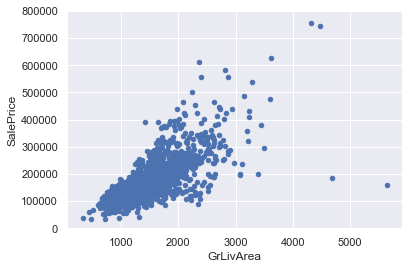

In [28]:
#bivariate analysis saleprice/grlivarea
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

#The two values with bigger 'GrLivArea' seem strange and they are not following the crowd.
#Therefore, we'll define them as outliers and delete them.

#The two observations in the top of the plot are those 7.something observations that we said we should be careful about. 
#They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [29]:
#deleting points
df.sort_values(by = 'GrLivArea', ascending = False)[:2]
df = df.drop(df[df['Id'] == 1299].index)
df = df.drop(df[df['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

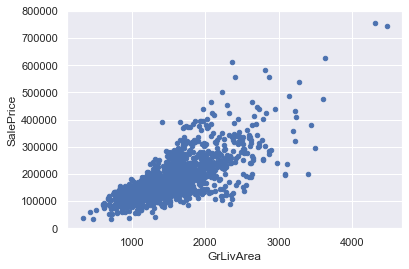

In [30]:
df.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

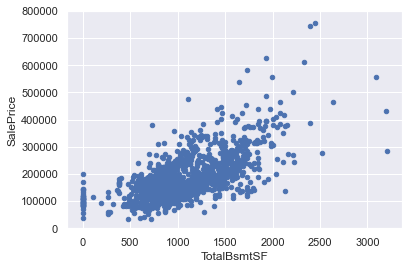

In [31]:
#bivariate analysis saleprice/grlivarea
df.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

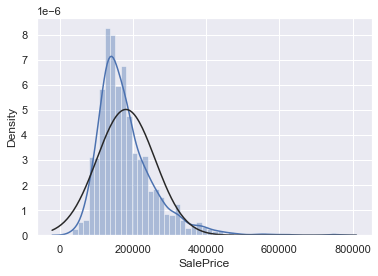

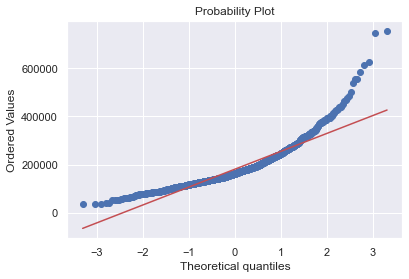

In [32]:
#In the search for normality
#The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

#Histogram - Kurtosis and skewness.
#Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

sns.distplot(df['SalePrice'], fit=norm)

fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

In [33]:
#Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
#A simple data transformation can solve the problem. 
#In case of positive skewness, log transformations usually works well. 

df['SalePrice'] = np.log(df['SalePrice'])

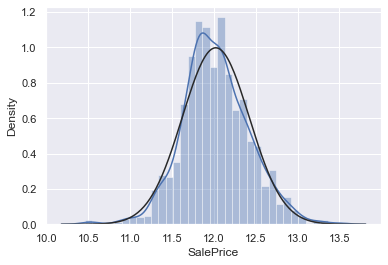

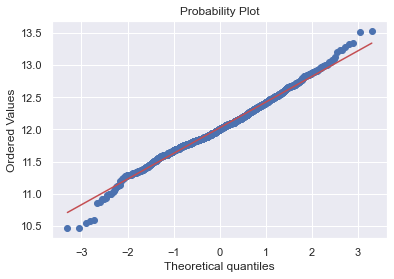

In [34]:
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

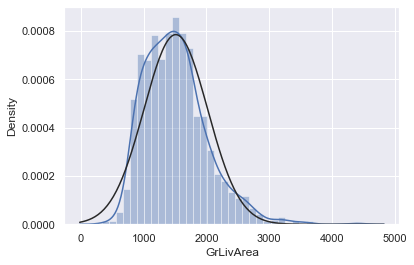

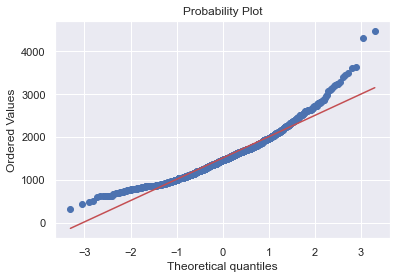

In [35]:
#Let's check what's going on with 'GrLivArea'
#histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

#A bit of skewness

In [36]:
#data transformation
df['GrLivArea'] = np.log(df['GrLivArea'])

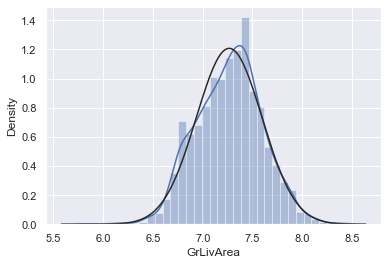

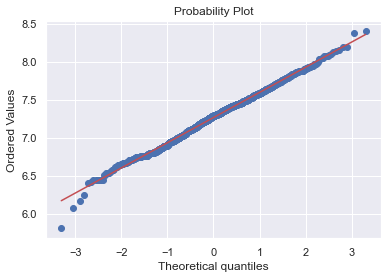

In [37]:
#Transformed histogram and normal probability plot
sns.distplot(df['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['GrLivArea'], plot=plt)

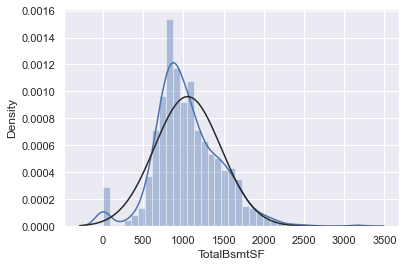

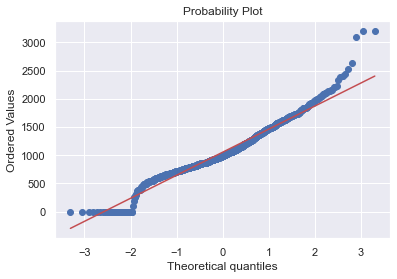

In [38]:
#Let's check what's going on with 'TotalBsmtSF'
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

#Something that, in general, presents skewness.
#A significant number of observations with value zero (houses without basement).
#A big problem because the value zero doesn't allow us to do log transformations.

#Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 
#This way we can transform data, without losing the effect of having or not basement.

In [39]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = pd.Series(len(df['TotalBsmtSF']), index=df.index)
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1

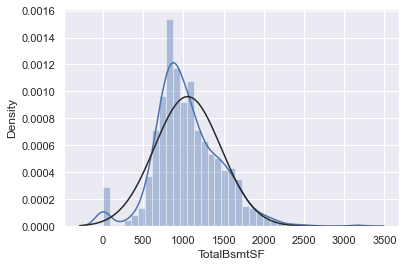

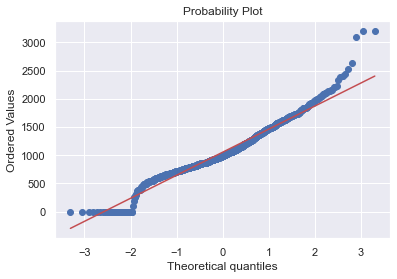

In [40]:
sns.distplot(df["TotalBsmtSF"], fit=norm)
fig = plt.figure()
res = stats.probplot(df["TotalBsmtSF"], plot=plt)